# Lab2 Exercise

According to Lab matrials, we can do some exercise.

Firstly, you can change the linear function to a nonlinear function, like x^2, x^3...; Then using )(mini) Batch Gradient Descent or Stochastic Gradient Descend (SGD), to check the loss curve.

In [ ]:
# import necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import torch

Predict before training with BGD: 4.0 tensor(-60., grad_fn=<AddBackward0>)
iteration: 0, 	 loss: 1667.490966796875, 	 weight: 6.438163757324219, 	 bias: -14.387205123901367
iteration: 5, 	 loss: 155.67845153808594, 	 weight: -0.9435842037200928, 	 bias: 0.883863091468811
iteration: 10, 	 loss: 64.85619354248047, 	 weight: 0.05310961604118347, 	 bias: 5.876775741577148
iteration: 15, 	 loss: 56.344661712646484, 	 weight: -0.07041506469249725, 	 bias: 7.514561653137207
iteration: 20, 	 loss: 55.4521369934082, 	 weight: -0.051571495831012726, 	 bias: 8.05108642578125
iteration: 25, 	 loss: 55.356658935546875, 	 weight: -0.053214266896247864, 	 bias: 8.226940155029297
iteration: 30, 	 loss: 55.346405029296875, 	 weight: -0.05272237956523895, 	 bias: 8.284566879272461
iteration: 35, 	 loss: 55.34530258178711, 	 weight: -0.05269695818424225, 	 bias: 8.303452491760254
iteration: 40, 	 loss: 55.345184326171875, 	 weight: -0.05267070233821869, 	 bias: 8.30964183807373
iteration: 45, 	 loss: 55.

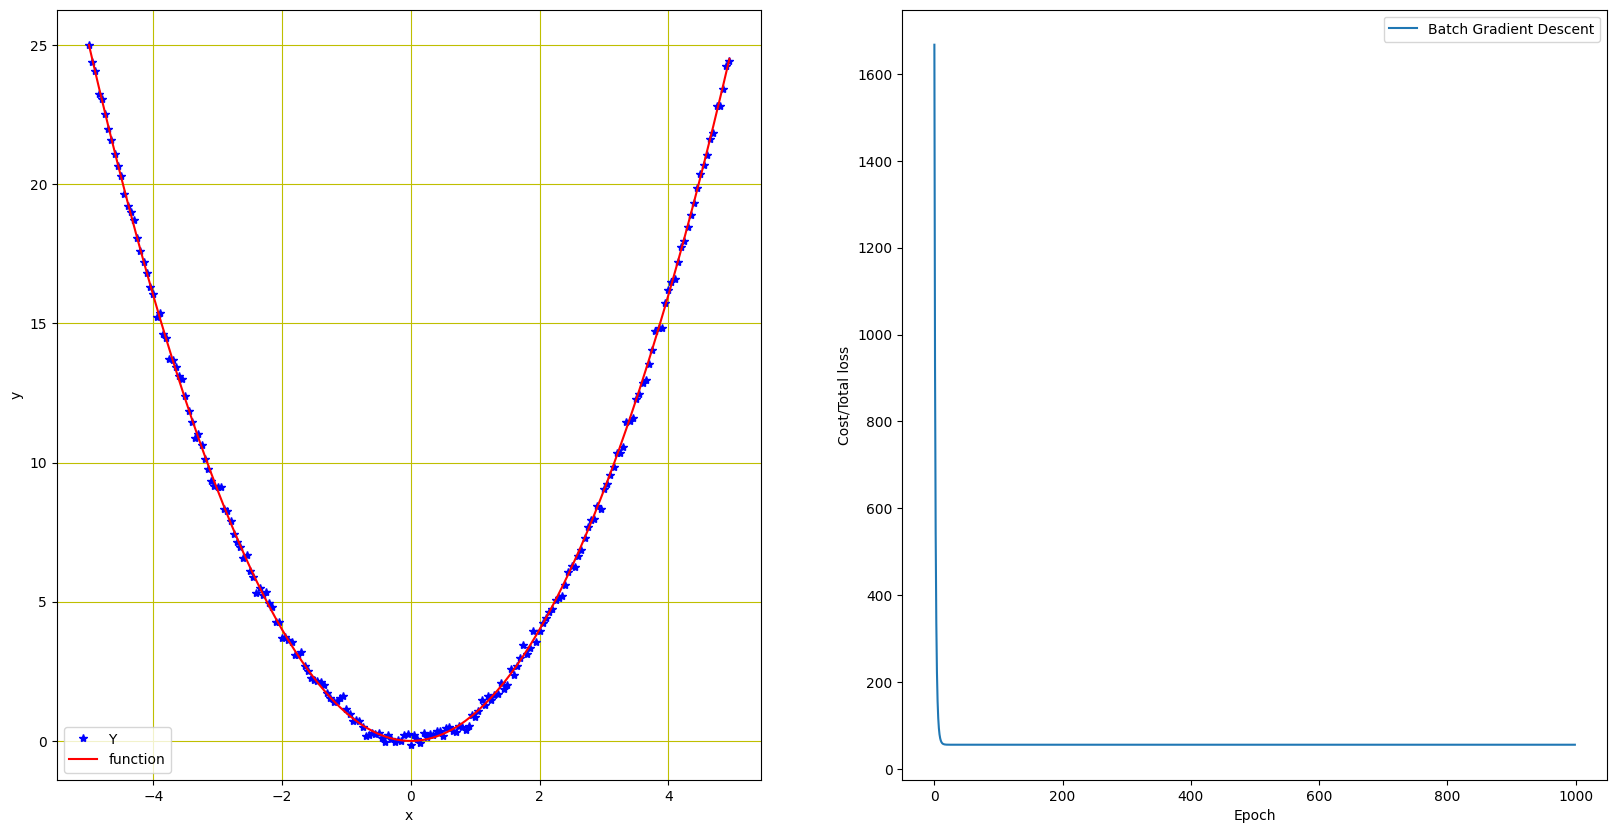

In [ ]:
# produce the data point with linear function
X = torch.arange(-5, 5, 0.05).view(-1, 1)
func = X**2
# Gaussian noise is added to create the variable Y
Y = func + 0.2 * torch.randn(X.size())

# plot and visualize the data points
fig = plt.figure(figsize=(20, 10))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot(X, Y, 'b*', label='Y')
ax1.plot(X, func, 'r', label='function')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend()
ax1.grid('True', color='y')

# define the forward function
def forward(x):
    return w * x + b

# define loss function with Mean Square Error (MSE)
def criterion(y_pred, y):
    return torch.mean((y_pred - y) ** 2)

#  initial parameters w and b
w = torch.tensor(-10.0, requires_grad=True)
b = torch.tensor(-20.0, requires_grad=True)

#  other parameters
step_size = 0.1
loss_BGD = []
n_iter = 1000

# Printing initial predictions
print('Predict before training with BGD:',4.0,forward(4.0))

for i in range (n_iter):
    # making predictions with forward pass
    Y_pred = forward(X)
    # calculating the loss between original and predicted data points
    loss = criterion(Y_pred, Y)
    # storing the calculated loss in a list
    loss_BGD.append(loss.item())
    # backward pass for computing the gradients of the loss w.r.t to learnable parameters
    loss.backward()
    # updateing the parameters after each iteration
    w.data = w.data - step_size * w.grad.data
    b.data = b.data - step_size * b.grad.data
    # zeroing gradients after each iteration
    w.grad.data.zero_()
    b.grad.data.zero_()
    # priting some values for understanding
    if i % 5 == 0:
        print('iteration: {}, \t loss: {}, \t weight: {}, \t bias: {}'.format(i, loss.item(), w.item(), b.item()))

# Predicting y after updating w
print('Predict after training with BGD:', 4.0, forward(4.0))

# plot the figure (loss_BGD)
plt.plot(loss_BGD, label="Batch Gradient Descent")
plt.xlabel('Epoch')
plt.ylabel('Cost/Total loss')
plt.legend()
plt.show()



Secondly, search the learnig rate between (0,1), and find the best learning rate for the **5-2**. Use the MNIST dataset.

In [ ]:
# import necessary libraries

import torch
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms


In [ ]:
# define hyperparameters
input_size = 28 * 28  # MNIST image size (flattened)

# number of nodes at hidden layer
hidden_size = 500

# number of output classes discrete range [0,9]
num_classes = 10

# number of times which the entire dataset is passed throughout the model
num_epochs = 30

# the size of input data took for one iteration
batch_size = 1000

# # learning rate
# lr = 1e-3

In [ ]:
# Download MNIST data
train_data = datasets.MNIST(root = './data', train = True,
                        transform = transforms.ToTensor(), download = True)

test_data = datasets.MNIST(root = './data', train = False,
                       transform = transforms.ToTensor(), download = True)

# Split dataset with DataLoader, train dataset and test dataset
train_gen = torch.utils.data.DataLoader(dataset = train_data, batch_size = batch_size, shuffle = True)
test_gen = torch.utils.data.DataLoader(dataset = test_data, batch_size = batch_size, shuffle = False)

100%|██████████| 9.91M/9.91M [00:00<00:00, 58.3MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.80MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 14.6MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.46MB/s]


In [ ]:
# Use GPU, if the GPU is available, otherwise use the CPU.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
# Define neural network model
class Net(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(Net,self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()  # Relu activation function, you can also use others like Tanh, Sigmold, etc.
    self.fc2 = nn.Linear(hidden_size, num_classes)

  def forward(self,x):
    out = self.fc1(x)
    out = self.relu(out)
    out = self.fc2(out)
    return out

# Build the model of neural network
net = Net(input_size, hidden_size, num_classes)
net.to(device)
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)


Searching for the best learning rate...

Training with learning rate: 0.00010

Training with learning rate: 0.00110

Training with learning rate: 0.00210

Training with learning rate: 0.00310

Training with learning rate: 0.00410

Training with learning rate: 0.00510

Training with learning rate: 0.00610

Training with learning rate: 0.00710

Training with learning rate: 0.00810

Training with learning rate: 0.00910

Best learning rate found: 0.00810 with final test accuracy: 98.34%


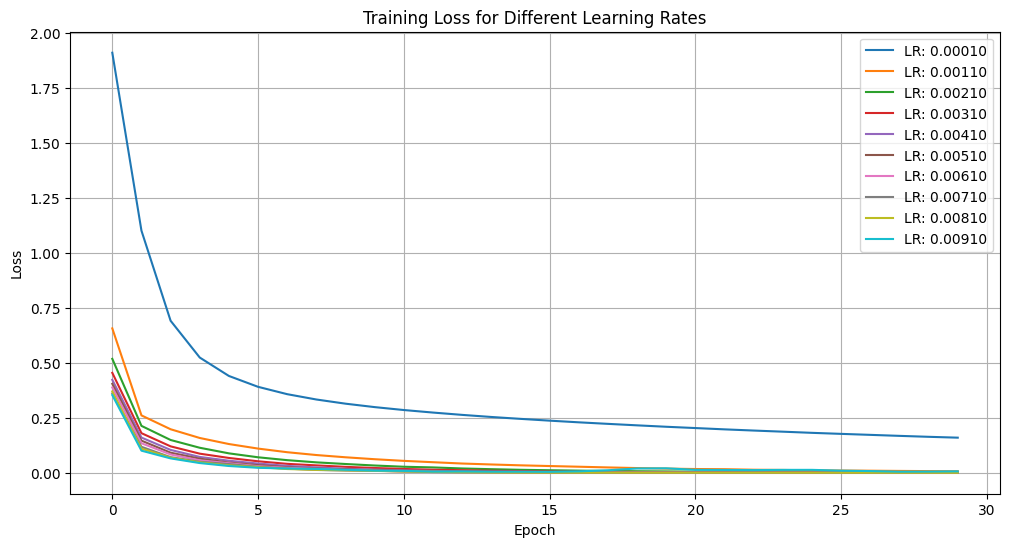

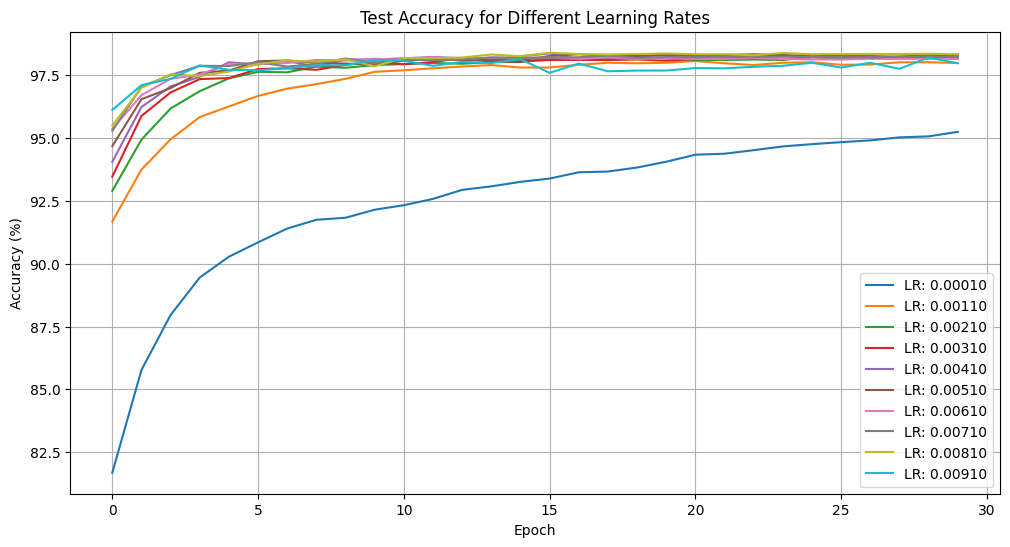

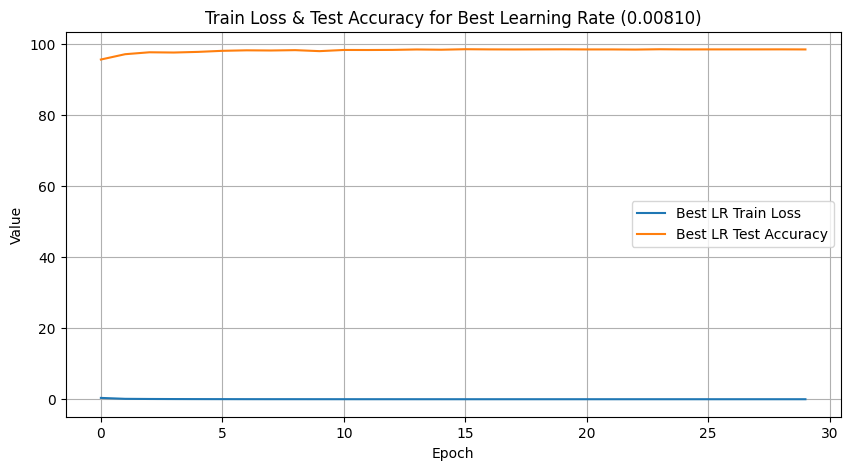

In [ ]:
lr_list = np.arange(0.0001, 0.01, 0.001)

# Lists to store metrics for plotting
all_train_losses = []
all_test_accuracies = []

best_lr = 0
max_test_accuracy = 0
best_lr_train_losses = []
best_lr_test_accuracies = []

print("Searching for the best learning rate...")

for lr in lr_list:
    print(f"\nTraining with learning rate: {lr:.5f}")
    # Re-initialize the model for each learning rate to ensure a fresh start
    net = Net(input_size, hidden_size, num_classes).to(device)

    # Define loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=lr)

    train_losses_per_lr = []
    test_accuracies_per_lr = []

    for epoch in range(num_epochs):
        # Training phase
        net.train() # Set model to training mode
        correct_train = 0
        total_train = 0
        total_loss = 0

        for i, (images, labels) in enumerate(train_gen):
            images = images.reshape(-1, input_size).to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = net(images)
            loss = criterion(outputs, labels)

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        avg_train_loss = total_loss / len(train_gen)
        train_accuracy = 100 * correct_train / total_train
        train_losses_per_lr.append(avg_train_loss)

        # Evaluation phase
        net.eval() # Set model to evaluation mode
        with torch.no_grad():
            correct_test = 0
            total_test = 0
            for images, labels in test_gen:
                images = images.reshape(-1, input_size).to(device)
                labels = labels.to(device)
                outputs = net(images)
                _, predicted = torch.max(outputs.data, 1)
                total_test += labels.size(0)
                correct_test += (predicted == labels).sum().item()
            test_accuracy = 100 * correct_test / total_test
            test_accuracies_per_lr.append(test_accuracy)

        # Optional: Print epoch-wise results for each LR
        # if (epoch + 1) % 5 == 0 or epoch == num_epochs - 1:
        #     print(f'  Epoch [{epoch+1}/{num_epochs}], Loss: {avg_train_loss:.4f}, Train Acc: {train_accuracy:.2f}%, Test Acc: {test_accuracy:.2f}%')

    all_train_losses.append(train_losses_per_lr)
    all_test_accuracies.append(test_accuracies_per_lr)

    final_test_accuracy_for_lr = test_accuracies_per_lr[-1]
    if final_test_accuracy_for_lr > max_test_accuracy:
        max_test_accuracy = final_test_accuracy_for_lr
        best_lr = lr
        best_lr_train_losses = train_losses_per_lr
        best_lr_test_accuracies = test_accuracies_per_lr


print(f"\nBest learning rate found: {best_lr:.5f} with final test accuracy: {max_test_accuracy:.2f}%")

# Plotting training curves of different learning rates (loss)
plt.figure(figsize=(12, 6))
for i, lr_val in enumerate(lr_list):
    plt.plot(all_train_losses[i], label=f'LR: {lr_val:.5f}')
plt.title('Training Loss for Different Learning Rates')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plotting training curves of different learning rates (test accuracy)
plt.figure(figsize=(12, 6))
for i, lr_val in enumerate(lr_list):
    plt.plot(all_test_accuracies[i], label=f'LR: {lr_val:.5f}')
plt.title('Test Accuracy for Different Learning Rates')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)
plt.show()

# Plot train loss and test accuracy for the best learning rate
plt.figure(figsize=(10, 5))
plt.plot(best_lr_train_losses, label='Best LR Train Loss')
plt.plot(best_lr_test_accuracies, label='Best LR Test Accuracy')
plt.title(f'Train Loss & Test Accuracy for Best Learning Rate ({best_lr:.5f})')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

Lastly, using the Fashion MNIST dataset, how can you improve the accuracy?
Please explore any method to achieve a much higher accuracy. For example, you can change the network model by add more layers, tune hypaerparameters, or any other ideas to obtain a better results.


In [ ]:
import torchvision
import matplotlib.pyplot as plt
from torch import nn, optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import numpy as np
